In [130]:
import pandas as pd
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import MACCSkeys
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
# upload the vasopressin dataset
data = pd.read_csv("data/chembl_Vasopressin_V1a_receptor_KI.csv", delimiter = ";")

smiles = data["Smiles"]
smiles.fillna("", inplace = True)
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
data["molecule"] = molecules

# add Morgan fingerprints to the dataframe
data["morgan_fingerprint"] = data["molecule"].apply(Chem.GetMorganFingerprintAsBitVect, args = (2, ), nBits = 1024)

In [3]:
# upload the drugbank dataset
drugbank = [m for m in Chem.SDMolSupplier("../data/drugbank.sdf") if m]

RDKit ERROR: [12:07:26] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:07:26] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:07:26] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:07:26] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:07:26] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:07:26] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:07:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: [12:07:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:07:27] ERROR: Could not sanitize molecule ending on line 250947
[12:07:27] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:07:27] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:07:27] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: 

RDKit ERROR: [12:07:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[12:07:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

[12:07:28] Explicit valence for atom # 56 O, 3, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [12:07:28] Explicit valence for atom # 56 O, 3, is greater than permitted
RDKit ERROR: [12:07:28] ERROR: Could not sanitize molecule ending on line 398455
[12:07:28] ERROR: Could not sanitize molecule ending on line 398455
RDKit ERROR: [12:07:28] ERROR: Explicit valence for atom # 56 O, 3, is greater than permitted
[12:07:28] ERROR: Explicit valence for atom # 56 O, 3, is greater than permitted
[12:07:28] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 18

RDKit ERROR: [12:07:28] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 18
RDKit ERROR: 
RDKit ERROR: [12:07:28] ERROR: Could not sanitize molecule ending on line 407765
[12:07:28] ERROR: Could not sanitize molecule ending on line 407765
RDKit ERROR: [12:07:28] ERRO

[12:07:28] ERROR: Explicit valence for atom # 6 B, 4, is greater than permitted
[12:07:28] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20

RDKit ERROR: [12:07:28] ERROR: Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [12:07:28] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [12:07:28] ERROR: Could not sanitize molecule ending on line 557517
[12:07:28] ERROR: Could not sanitize molecule ending on line 557517
RDKit ERROR: [12:07:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
[12:07:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20

[12:07:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10

RDKit ERROR: 
RDKit ERROR: [12:07:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:07:28] ERROR: Could not sanitize molecule ending on line 561344
RDKit ERROR: [12:07:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit E

RDKit ERROR: [12:07:29] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[12:07:29] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10

[12:07:30] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [12:07:30] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [12:07:30] ERROR: Could not sanitize molecule ending on line 995692
[12:07:30] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [12:07:30] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
[12:07:30] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
[12:07:30] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:07:30] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:07:30] ERROR: Could not sanitize molecule ending on line 1151592
[12:07:30] ERROR: Could not sanitize molecule ending on line 1151592


In [5]:
# create the drugbank dataframe
drugbank_morgan_fingerprint = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in drugbank]
drugbank_formulas = [m.GetProp("FORMULA") for m in drugbank]
drugbank_generics = [m.GetProp("GENERIC_NAME") for m in drugbank]

drugbank_df = pd.DataFrame([drugbank_formulas, drugbank_generics, drugbank, drugbank_morgan_fingerprint]).transpose()
drugbank_df.columns = ["formula", "generic_name", "molecule", "morgan_fingerprint"]

## Descriptors

In [57]:
MQNs_column_names = ["MQN" + str(i) for i in range(1, 43)]

In [63]:
# calculate the descriptors for the ligand set
data["logP"] = data["molecule"].apply(Descriptors.MolLogP)
data["TPSA"] = data["molecule"].apply(Descriptors.TPSA)
data["HBA"] = data["molecule"].apply(rdMolDescriptors.CalcNumHBA)
data["HBD"] = data["molecule"].apply(rdMolDescriptors.CalcNumHBD)
data["MQN"] = data["molecule"].apply(rdMolDescriptors.MQNs_)
data[MQNs_column_names] = pd.DataFrame(data["MQN"].to_list(), columns = MQNs_column_names)
data.drop(columns = ["MQN"], inplace = True)

# calculate the descriptors for the drugbank dataset
drugbank_df["logP"] = drugbank_df["molecule"].apply(Descriptors.MolLogP)
drugbank_df["TPSA"] = drugbank_df["molecule"].apply(Descriptors.TPSA)
drugbank_df["HBA"] = drugbank_df["molecule"].apply(rdMolDescriptors.CalcNumHBA)
drugbank_df["HBD"] = drugbank_df["molecule"].apply(rdMolDescriptors.CalcNumHBD)
drugbank_df["MQN"] = drugbank_df["molecule"].apply(rdMolDescriptors.MQNs_)
drugbank_df[MQNs_column_names] = pd.DataFrame(drugbank_df["MQN"].to_list(), columns = MQNs_column_names)
drugbank_df.drop(columns = ["MQN"], inplace = True)

In [64]:
# combine the dataframes
data["source"] = "vasopressin"
drugbank_df["source"] = "drugbank"

combined_df = data.append(drugbank_df, ignore_index = True)

In [65]:
combined_df.loc[combined_df["source"] == "drugbank"].head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42,formula,generic_name
1717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,3,0,0,0,0,0,0,C98H138N24O33,Bivalirudin
1718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,0,0,0,0,2,1,C59H84N18O14,Goserelin
1719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,0,0,0,1,0,0,C46H64N14O12S2,Desmopressin
1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,5,0,0,0,0,2,1,C70H92ClN17O14,Cetrorelix
1721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,C62H111N11O12,Cyclosporine


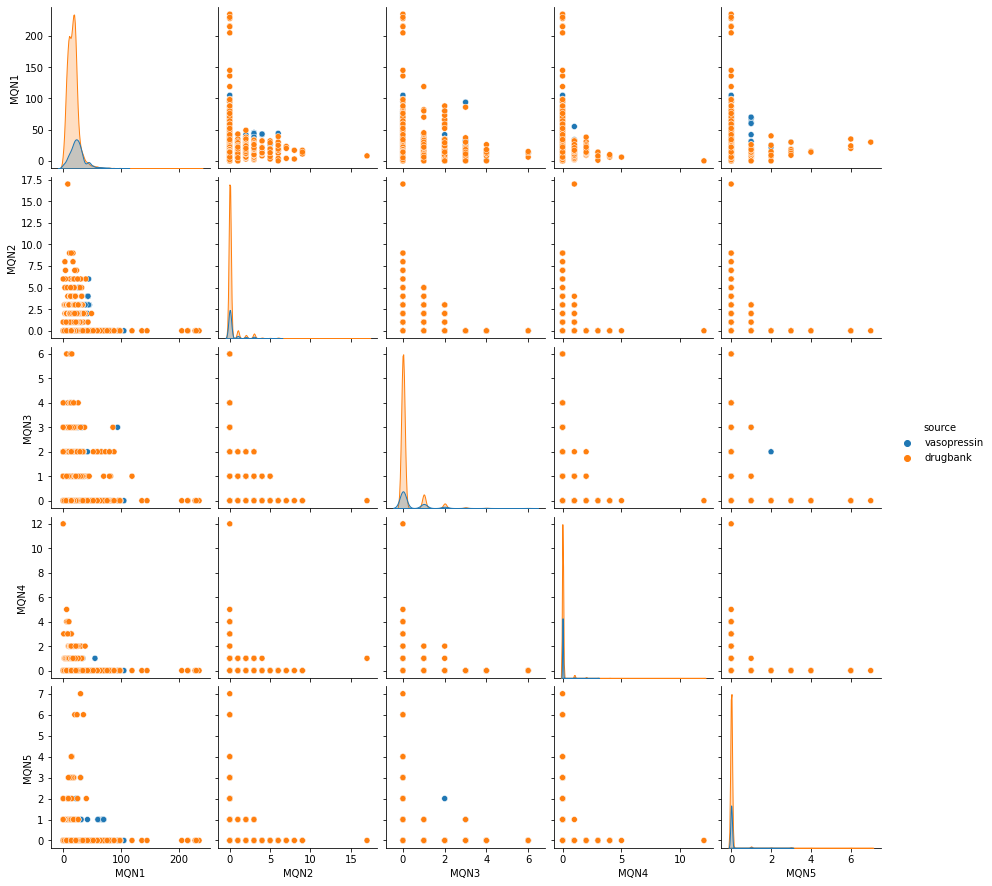

In [124]:
sns.pairplot(combined_df[MQNs_column_names[:5] + ["source"]], hue = "source")

## PCA

In [93]:
df = combined_df[MQNs_column_names]
df_normalized = (df - df.mean()) / df.std()
pca = PCA(n_components = df.shape[1])
pca_res = pca.fit_transform(df_normalized)

array([ 2.04053682e-02, -2.92058325e+00,  4.31150565e-01, -3.93788810e-01,
       -3.02411804e-01,  1.13493995e+00, -4.75404306e-01, -1.15521501e+00,
       -1.70982479e-01, -1.53770980e-02,  2.75858106e-01, -1.72215400e-01,
       -1.58236646e-01,  5.20756959e-02, -1.18314430e+00, -5.44666441e-01,
       -4.62213630e-01,  8.74310666e-02, -1.69143278e-01, -2.48303983e-02,
        7.46731354e-01, -3.93432850e-01,  7.34950513e-01,  7.70779546e-02,
        1.65429616e-01,  3.23102279e-01,  1.49573865e-01,  2.89529660e-01,
       -2.93060224e-01, -4.14848487e-02, -1.38341495e-01, -4.82944231e-02,
       -7.89149522e-03, -5.54990355e-04,  4.05862299e-02,  1.99495871e-03,
       -3.92264065e-02, -9.68048223e-03, -2.20477084e-03,  8.20645520e-03,
        3.82092579e-03,  1.98299375e-03])

In [87]:
pca_column_names = ["PCA" + str(i) for i in range(1, 43)]

In [99]:
combined_df["PCA"] = pca_res.tolist()

combined_df[pca_column_names] = pd.DataFrame(combined_df["PCA"].to_list(), columns = pca_column_names)
combined_df.drop(columns = ["PCA"], inplace = True)

In [100]:
combined_df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42
0,CHEMBL1085301,NaN,0.0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,-0.007891,-0.000555,0.040586,0.001995,-0.039226,-0.009680,-0.002205,0.008206,0.003821,0.001983
1,CHEMBL1084008,NaN,0.0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,0.020410,-0.031032,0.024068,0.002013,-0.041764,-0.011035,-0.003474,0.008643,0.004236,0.001611
2,CHEMBL4173250,NaN,0.0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,-0.023747,-0.018852,-0.006093,-0.007984,-0.009935,-0.006741,-0.000775,0.002734,0.001612,0.000720
3,CHEMBL382301,ATOSIBAN,4.0,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,-0.025737,0.118808,0.064047,-0.018922,0.051653,0.006340,0.003182,-0.006782,-0.000465,0.001856
4,CHEMBL1085299,NaN,0.0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,0.166565,-0.013614,0.035952,0.001281,-0.042336,-0.008095,-0.003996,0.011206,0.004874,0.002552


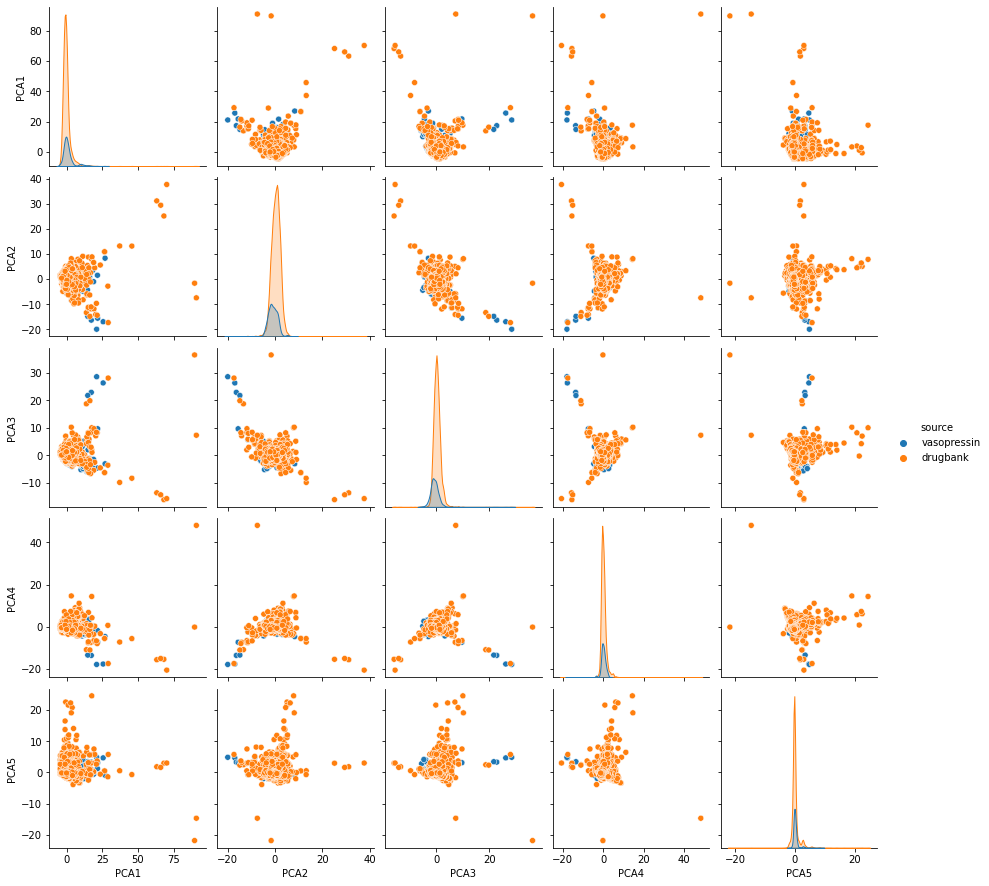

In [117]:
# todo fix
sns.pairplot(combined_df[pca_column_names[:5] + ["source"]], hue = "source")

## Multidimensional scaling

In [109]:
sparse_mat = distance.pdist(list(combined_df["morgan_fingerprint"]), metric = "jaccard")
dist_mat = distance.squareform(sparse_mat)

In [112]:
clf = MDS(n_components = 2, n_init = 1, max_iter = 100, dissimilarity = "precomputed")
mds = clf.fit_transform(dist_mat)

In [116]:
combined_df[["mds_x", "mds_y"]] = mds.tolist()

<AxesSubplot:xlabel='mds_x', ylabel='mds_y'>

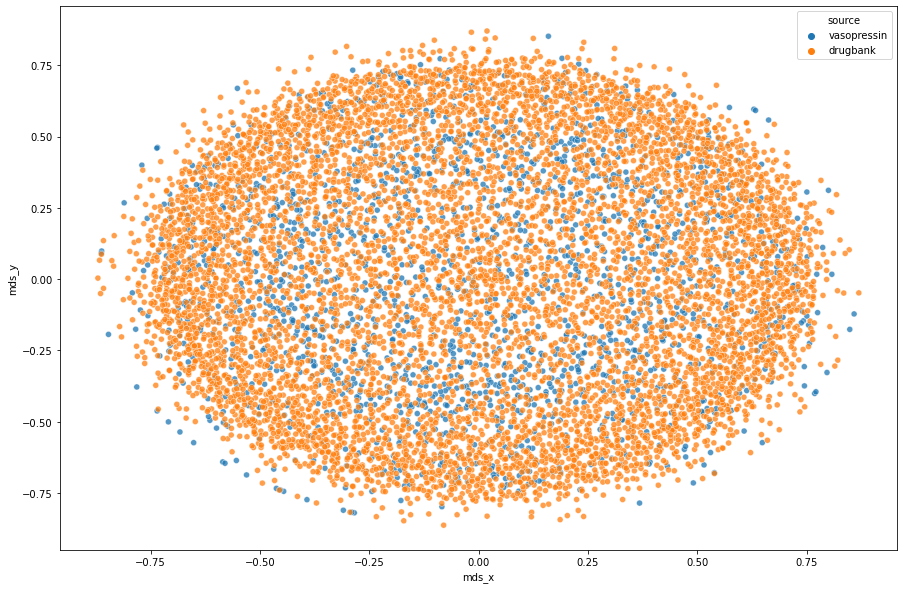

In [123]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = "mds_x", y = "mds_y", data = combined_df, hue = "source", legend = "brief", ax = ax, alpha = 0.75)

## t-SNE

In [131]:
clf = TSNE(n_components = 2, metric = "precomputed")
tsne = clf.fit_transform(dist_mat)

/Users/katerina/Applications/miniconda3/envs/pocitacovy_navrh_leciv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/katerina/Applications/miniconda3/envs/pocitacovy_navrh_leciv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/katerina/Applications/miniconda3/envs/pocitacovy_navrh_leciv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [132]:
combined_df[["tsne_x", "tsne_y"]] = tsne.tolist()

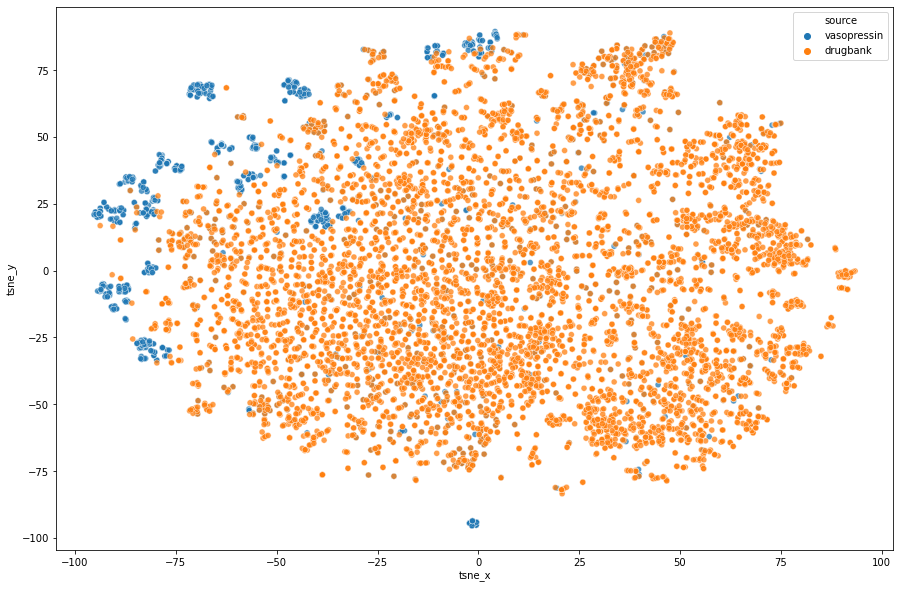

In [136]:
fig, ax = plt.subplots(figsize = (15, 10))
plot = sns.scatterplot(x = "tsne_x", y = "tsne_y", data = combined_df, hue = "source", legend = "brief", ax = ax, alpha = 0.75)